## <span style="color:blue">  Numerical exercises 8</span>


Mediante tecinche Monte Carlo è possibile anche studiare sistemi quantistici il cui ground state è descritto dall'equazione di Schtoedinger:
$$H\Psi_0(\textbf{R})=E_0\Psi_0(\textbf{R})$$<p>
Dove $H$ è l'hamiltoniana del sisitema. Il teorema variazionale per stati quantistici afferma che il valore di aspettazione della Hamiltoniana $H$ valutata con una funzione di prova $\Psi_T$  è un limite superiore al ground state $E_0$: $$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T| {\hat H} | \Psi_T \rangle}
{\langle \Psi_T | \Psi_T\rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$<p>

Per usare tecniche Monte Carlo, per risolvere tale problema si può campionare la distribuzione di probabilità:$$ \rho(\textbf{R})=\frac{|\Psi(\textbf{R})|^2}{\int |\Psi(\textbf{R})|^2d\textbf{R}}$$
 quindi l'energia variazionale diventa:$$ E_{var}=\int \rho(\textbf{R}) E(\textbf{R})d\textbf{R}=\langle E(\textbf{R})\rangle\geq E_0$$ dove $E(\textbf{R})$ è l'energia locale definita quindi come: $$E(\textbf{R})=\frac{1}{\Psi_T}H\Psi_T(\textbf{R})$$
Quindi utilizzando l'algoritmo di Metropolis si può campionare $\textbf{R}$ a partire dalla distribuzione di probabilità $\rho(\textbf{R})$ e quindi valurare $E(\textbf{R})$.

Quindi parametrizzando una funzione di trial $\Psi_T(W|\textbf{R})$ con $W$ parametri e si vuole trovare $W$ che minimizzano l'energia variazionale.




### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

Dove la funziona d'onda di Trial è data da:$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
Che dipende da due parametri ovvero $\sigma$ e $\mu$ e il potenziale usato per risolvere l'equazione di Schroedinger invece è:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$


Si sono quindi dapprima ottimizzati i parametri di modo da minimizzare l'energia. Per far questo sono state effettuate più simulazioni Monte Carlo con diversi utilizzando diversi valori di $\mu$ e $\sigma$.

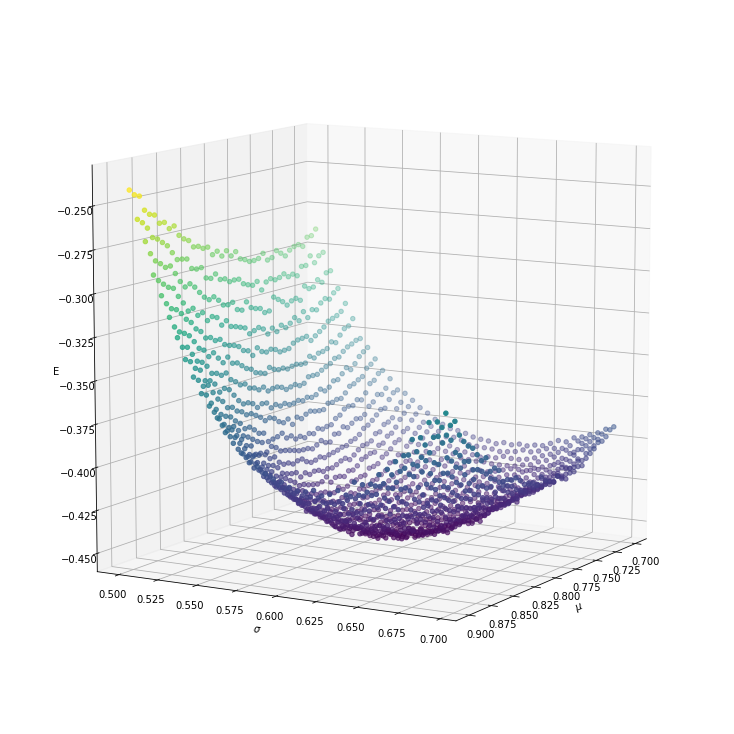

Parametri
Mu= 0.8
Sigma= 0.615


In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



Mu= np.loadtxt("Es8/Es8.01/Ave_int_par.dat", usecols=(2), unpack='true')
Sigma= np.loadtxt("Es8/Es8.01/Ave_int_par.dat", usecols=(3), unpack='true')
Ene= np.loadtxt("Es8/Es8.01/Ave_int_par.dat", usecols=(0), unpack='true')


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(Mu, Sigma, Ene, c=Ene, marker='o')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel('E')
ax.view_init(10, 30)
plt.show()

print("Parametri")
index_min=np.argmin(Ene)
print("Mu=", Mu[index_min])
print("Sigma=", Sigma[index_min])

Utilizzando i parametri sopra trovati per $\mu$ e $\sigma$ si ottiene:

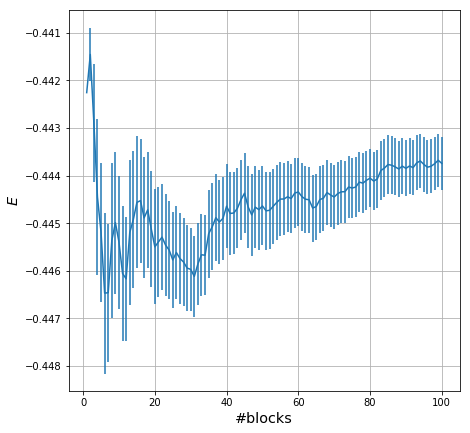

In [61]:
blk,Ene,dev_Ene= np.loadtxt("Es8/Es8.01/output.Integral.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(7,7))
plt.errorbar(blk,Ene,yerr=dev_Ene)
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$E$',fontsize='x-large')
plt.grid(True)
plt.show()

Ground state energy:  -0.46046587969271535


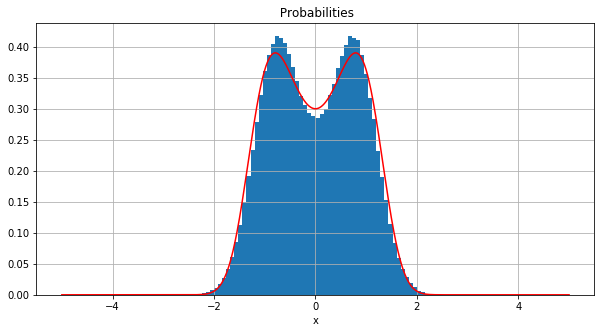

In [62]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
x = np.linspace(-a/2, a/2, N)


# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

index, x1, y1 = np.loadtxt("Es8/Es8.01/Distr/Prob_distr8_6.out", usecols=(0,1,2), delimiter='\t', unpack='true')



# Plot a few things
plt.figure(figsize=(10,5))
plt.bar(x1, y1, width=0.08)
plt.grid(True)
plt.plot(x,(psi[0])**2,color="r")

plt.title(" Probabilities")
plt.xlabel("x")
plt.grid(True)


Dai risultati ottenuti, si nota come un buon accordo tra $|\Psi_T(x)|^2$ e  la distribuzione di probabilità della funzione d'onda di Ground State.

**Path Integral Montecarlo**: Tutte le proprietà sia statiche che dinamiche di un sistema quantistico possono essere ottenute a partire dalla matrice densità $$\rho(\textbf{R},\textbf{R'},\beta)=\langle \textbf{R}|e^{-\beta H}|\textbf{R'}\rangle$$ Dove $\beta$ rappresenta l'inverso della temperatura o un "tempo immaginario" $\beta=\frac{1}{kT}$. Utilizzando la matrice densità il valore medio di qualsiasi osservabile di interesse può essere valutato: $$\langle \hat{O} \rangle= Tr(\hat{\rho}\hat{O})=\frac{1}{Tr(\hat{\rho})}\int \hat{\rho}(\textbf{R},\textbf{R'},\beta)\langle \textbf{R}|\hat{O}|\textbf{R'}\rangle d\textbf{R}d\textbf{R'}$$ per un operatore diagonale. La  matrice densità  può essere dcomposta  in modo esatto usando la decomposizione di Trotter portando alla rappresentazione Path Integral: $$\rho(\textbf{R},\textbf{R'},\beta)=\int d\textbf{R}_1\dots d\textbf{R}_{M-1}\rho(\textbf{R},\textbf{R}_1,\frac{\beta}{M})\dots\rho(\textbf{R}_{M-1},\textbf{R'},\frac{\beta}{M})$$. Se consideriamo gli elementi di matrice $\rho(\textbf{R}_i,\textbf{R}_{i+1},\frac{\beta}{M})=\langle \textbf{R}|e^{-\frac{\beta}{M} H}|\textbf{R'}\rangle$ si può approssimare tale elemento di matrice ponendosi nel limite ad alte temperature: $\frac{\beta}{M}\ll1$ e quindi l'elemento di matrice è scrivibile come: $$\hat{\rho}=e^{-\frac{\beta}{M}\frac{V(\textbf{R}_i)}{2}}\frac{exp(-|\textbf{R}_i-\textbf{R}_{i+1}|^2M/4\lambda \beta)}{(4\pi\lambda \beta/M)^{3/2}}e^{\frac{\beta}{M}\frac{V(\textbf{R}_{i+1})}{2}}$$
Tale Approssimazione è l'approssimazione primitiva, si sta mappando il sistema quantistico in termini di sistemi di polimeri interagenti.<p>

Quindi si possono usare tecniche di Montecarlo per studiare un tale sistema in particolare, per semplicità, se si considera un particella non interagente. Si vuole allora campionare l'integrale:$$\rho^{free}(x_0,x_N,\beta)=\int dx_1\dots dx_N \rho^{free}(x_0,x_1,\Delta_{\tau})\rho^{free}(x_1,x_2,\Delta_{\tau})\dots \rho^{free}(x_{N-1},x_{N},\Delta_{\tau})=\int dx_1\dots dx_N p(x_1,\dots x_{N-1})$$<p> Quindi se si considera una mossa Monte Carlo in cui tutte le posizioni sono fisse eccetto $x_k$. La probabilità di accettazione sarà data da: $$p^{free}(x_k|x_{k-1},x_{k+1})\propto \rho^{free}(x_{k-1},x_k,\Delta_{\tau})\rho^{free}(x_{k1},x_{k+1},\Delta_{\tau})=exp\bigg(\frac{(x_k-\langle x_k \rangle)^2}{2\sigma^2}\bigg)$$ con $\langle x_k \rangle$ la poszione media tra $x_{k-1}$ e $x_{k+1}$ quindi si può fare un path-sampling algoritmo generando un punto $x_k$ da una distribuzione gaussiana con opportuni parametri e quindi campionando la $\rho(x_0,x_N,\beta)$

**Path Integral Ground State**: I valori di aspettazione per il ground state a temperatura nulla possono essere valutati utilizzando il metododel path integral ground-state Monte Carlo. L'equazione di evoluzione temporale per la funzione d'onda sarà data da::$$\Psi(\textbf{R},t)=\int d\textbf{R'}G(\textbf{R},\textbf{R'},t,0)\Psi(\textbf{R'},0)$$ e utilizzando una rotazione di Wick $(t\rightarrow it/\hbar=\tau$ ciioè definenendo un tempo immaginario si può scrivere:$$\Psi(\textbf{R},t)=\int d\textbf{R'}\langle \textbf{R}|e^{-\tau H}|\textbf{R'}\rangle \Psi(\textbf{R'},0)$$ Quindi se l'ampiezza di probabilità $\Psi(\textbf{R},0)$ $\Psi(\textbf{R},\tau)$ e infine $G(\textbf{R},\textbf{R'},t,0)$ sono quantità reali e positive, il tutto può essere interpretato come densità di probabilità e probabilità di tranisizione e si può creare un processo di Markov con un algoritmo di Metropolis che converge al campionamento di $\Psi(\textbf{R},\tau)$. Per un evoluzione con grande tempo immaginario lo stato quantistico $\Psi(\textbf{R},\tau)$ tenderà al ground state. La differenza quindi rispetto al *path integral Monte Carlo* è che si considera un cammino troncato su una funzione d'onda di prova (a differenza del PIMC il PIGS ha bisogno di una funzione d'onda di prova per valutare i valori di aspettazione)

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

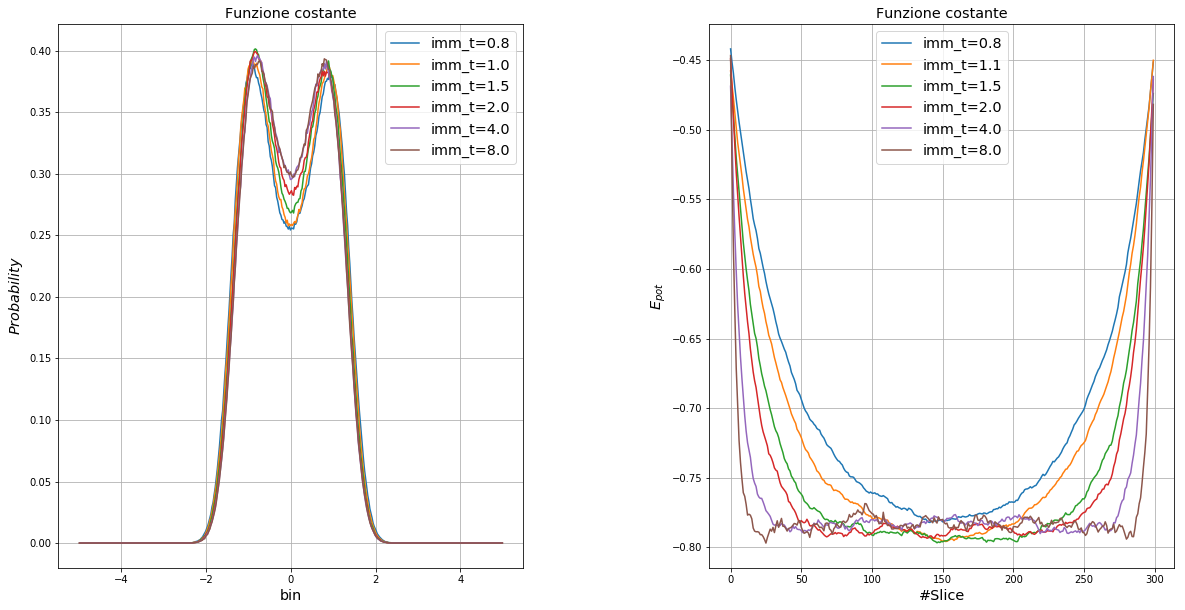

In [63]:

import matplotlib.gridspec as gridspec

current_position08,hist_average08,error8= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability08.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability1.dat", usecols=(0,1,2), unpack='true')
current_position15,hist_average15,error15= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability15.dat", usecols=(0,1,2), unpack='true')
current_position2,hist_average2,error2= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability2.dat", usecols=(0,1,2), unpack='true')
current_position4,hist_average4,error4= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability4.dat", usecols=(0,1,2), unpack='true')
current_position8,hist_average8,error8= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/probability8.dat", usecols=(0,1,2), unpack='true')



time_slice08,E_pot08,E_pot_error8= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential08.dat", usecols=(0,1,2), unpack='true')
time_slice1,E_pot1,E_pot_error1= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential1.dat", usecols=(0,1,2), unpack='true')
time_slice15,E_pot15,E_pot_error15= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential15.dat", usecols=(0,1,2), unpack='true')
time_slice2,E_pot2,E_pot_error2= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential2.dat", usecols=(0,1,2), unpack='true')
time_slice4,E_pot4,E_pot_error4= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential4.dat", usecols=(0,1,2), unpack='true')
time_slice8,E_pot8,E_pot_error8= np.loadtxt("Es8/QMC_1D/Funzione_Uniform/potential8.dat", usecols=(0,1,2), unpack='true')




G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(current_position08,hist_average08,label="imm_t=0.8")
fig_1.plot(current_position1,hist_average1,label="imm_t=1.0")
fig_1.plot(current_position15,hist_average15,label="imm_t=1.5")
fig_1.plot(current_position2,hist_average2,label="imm_t=2.0")
fig_1.plot(current_position4,hist_average4,label="imm_t=4.0")
fig_1.plot(current_position4,hist_average8,label="imm_t=8.0")

fig_1.set_title(r'Funzione costante',fontsize='x-large')
fig_1.set_xlabel('bin',fontsize='x-large')
fig_1.set_ylabel('$Probability$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.plot(time_slice08,E_pot08,label="imm_t=0.8")
fig_2.plot(time_slice1,E_pot1,label="imm_t=1.1")
fig_2.plot(time_slice15,E_pot15,label="imm_t=1.5")
fig_2.plot(time_slice2,E_pot2,label="imm_t=2.0")
fig_2.plot(time_slice4,E_pot4,label="imm_t=4.0")
fig_2.plot(time_slice8,E_pot8,label="imm_t=8.0")
fig_2.set_title(r'Funzione costante',fontsize='x-large')
fig_2.set_xlabel('#Slice',fontsize='x-large')
fig_2.set_ylabel(r'$E_{pot}$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)


plt.show()

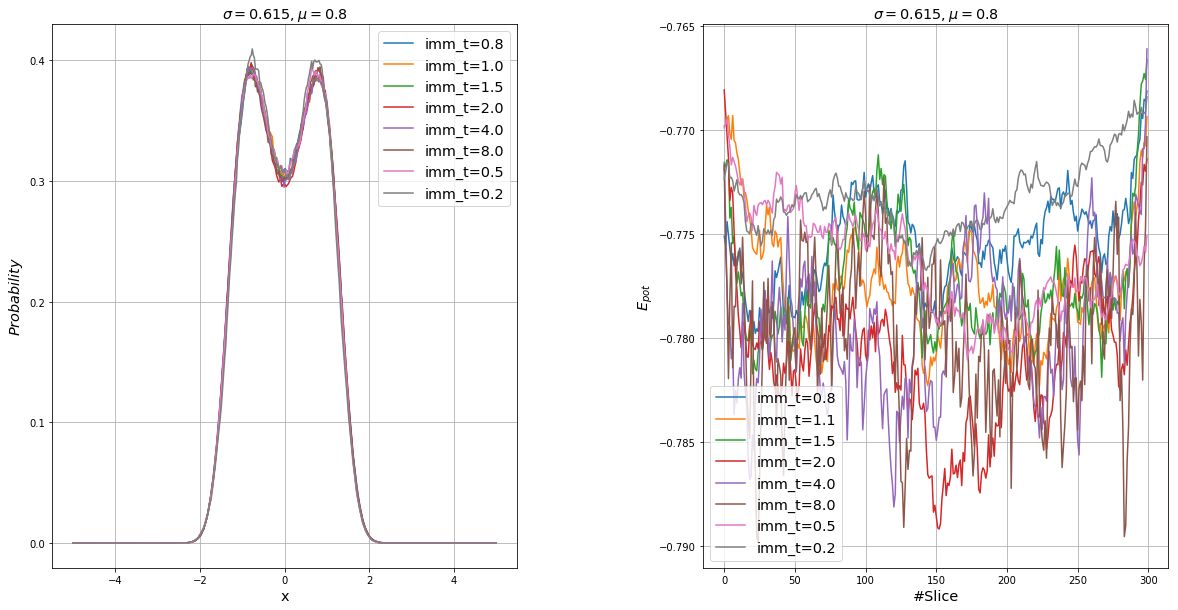

In [64]:
current_position08,hist_average08,error8= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability08.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability1.dat", usecols=(0,1,2), unpack='true')
current_position15,hist_average15,error15= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability15.dat", usecols=(0,1,2), unpack='true')
current_position2,hist_average2,error2= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability2.dat", usecols=(0,1,2), unpack='true')
current_position4,hist_average4,error4= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability4.dat", usecols=(0,1,2), unpack='true')
current_position8,hist_average8,error8= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability8.dat", usecols=(0,1,2), unpack='true')
current_position05,hist_average05,error05= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability05.dat", usecols=(0,1,2), unpack='true')
current_position02,hist_average02,error02= np.loadtxt("Es8/QMC_1D/Funzione_Trial/probability02.dat", usecols=(0,1,2), unpack='true')



time_slice08,E_pot08,E_pot_error8= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential08.dat", usecols=(0,1,2), unpack='true')
time_slice1,E_pot1,E_pot_error1= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential1.dat", usecols=(0,1,2), unpack='true')
time_slice15,E_pot15,E_pot_error15= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential15.dat", usecols=(0,1,2), unpack='true')
time_slice2,E_pot2,E_pot_error2= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential2.dat", usecols=(0,1,2), unpack='true')
time_slice4,E_pot4,E_pot_error4= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential4.dat", usecols=(0,1,2), unpack='true')
time_slice8,E_pot8,E_pot_error8= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential8.dat", usecols=(0,1,2), unpack='true')
time_slice05,E_pot05,E_pot_error05= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential05.dat", usecols=(0,1,2), unpack='true')
time_slice02,E_pot02,E_pot_error02= np.loadtxt("Es8/QMC_1D/Funzione_Trial/potential02.dat", usecols=(0,1,2), unpack='true')




G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(current_position08,hist_average08,label="imm_t=0.8")
fig_1.plot(current_position1,hist_average1,label="imm_t=1.0")
fig_1.plot(current_position15,hist_average15,label="imm_t=1.5")
fig_1.plot(current_position2,hist_average2,label="imm_t=2.0")
fig_1.plot(current_position4,hist_average4,label="imm_t=4.0")
fig_1.plot(current_position4,hist_average8,label="imm_t=8.0")
fig_1.plot(current_position05,hist_average05,label="imm_t=0.5")
fig_1.plot(current_position02,hist_average02,label="imm_t=0.2")

fig_1.set_title(r'$\sigma=0.615, \mu=0.8$',fontsize='x-large')
fig_1.set_xlabel('x',fontsize='x-large')
fig_1.set_ylabel('$Probability$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.plot(time_slice08,E_pot08,label="imm_t=0.8")
fig_2.plot(time_slice1,E_pot1,label="imm_t=1.1")
fig_2.plot(time_slice15,E_pot15,label="imm_t=1.5")
fig_2.plot(time_slice2,E_pot2,label="imm_t=2.0")
fig_2.plot(time_slice4,E_pot4,label="imm_t=4.0")
fig_2.plot(time_slice8,E_pot8,label="imm_t=8.0")
fig_2.plot(time_slice05,E_pot05,label="imm_t=0.5")
fig_2.plot(time_slice02,E_pot02,label="imm_t=0.2")


fig_2.set_title(r'$\sigma=0.615, \mu=0.8$',fontsize='x-large')
fig_2.set_xlabel('#Slice',fontsize='x-large')
fig_2.set_ylabel(r'$E_{pot}$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)


plt.show()

Dai grafici si nota come se si considera una funzione d'onda di Trial costante per convergere vi è bisogno di un imaginary time $\tau>2$ così che la distribuzione di probabilità sia campionata. Al contrario utilizzando come funzione d'onda di Trial quella che abbiamo trovato per minimizzare il problema per il variational, si nota che si inizia ad avere i primi problemi di campionamento per $\tau= 0.2$.

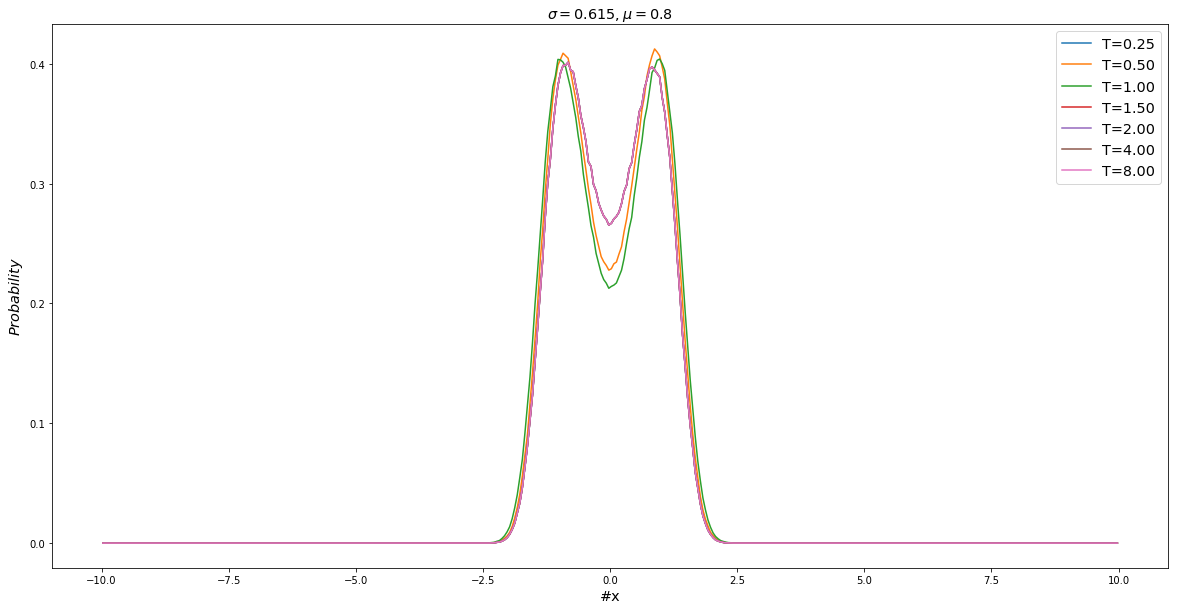

In [65]:
current_position025,hist_average025,error025= np.loadtxt("Es8/QMC_1D/Temp/probability0.25.dat", usecols=(0,1,2), unpack='true')
current_position050,hist_average050,error050= np.loadtxt("Es8/QMC_1D/Temp/probability0.5.dat", usecols=(0,1,2), unpack='true')
current_position075,hist_average075,error075= np.loadtxt("Es8/QMC_1D/Temp/probability0.75.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("Es8/QMC_1D/Temp/probability1.dat", usecols=(0,1,2), unpack='true')
current_position15,hist_average15,error15= np.loadtxt("Es8/QMC_1D/Temp/probability1.5.dat", usecols=(0,1,2), unpack='true')
current_position2,hist_average2,error2= np.loadtxt("Es8/QMC_1D/Temp/probability2.dat", usecols=(0,1,2), unpack='true')
current_position125,hist_average125,error125= np.loadtxt("Es8/QMC_1D/Temp/probability1.25.dat", usecols=(0,1,2), unpack='true')
current_position4,hist_average4,error4= np.loadtxt("Es8/QMC_1D/Temp/probability4.dat", usecols=(0,1,2), unpack='true')
current_position8,hist_average8,error8= np.loadtxt("Es8/QMC_1D/Temp/probability8.dat", usecols=(0,1,2), unpack='true')


plt.figure(figsize=(20,10))
plt.plot(current_position025,hist_average025,label="T=0.25")
plt.plot(current_position050,hist_average050,label="T=0.50")
#plt.plot(current_position075,hist_average075,label="T=0.75")
plt.plot(current_position1,hist_average1,label="T=1.00")
#plt.plot(current_position125,hist_average125,label="T=1.25")
plt.plot(current_position15,hist_average15,label="T=1.50")
plt.plot(current_position2,hist_average2,label="T=2.00")
plt.plot(current_position4,hist_average4,label="T=4.00")
plt.plot(current_position8,hist_average8,label="T=8.00")
plt.title(r'$\sigma=0.615, \mu=0.8$',fontsize='x-large')
plt.xlabel('#x',fontsize='x-large')
plt.ylabel(r'$Probability$',fontsize='x-large')
plt.legend(fontsize='x-large')

plt.show()

Nel grafico è riportata la variazion della funzione d'onda al variare della temperatura.